# 한글 사용

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


# 외부 데이터 업로드

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from google.colab import files

In [ ]:
uploaded = files.upload()

Saving vgames2.csv to vgames2 (2).csv


In [ ]:
df = pd.read_csv('vgames2.csv',index_col=0)

# 단위를 맞추기 위한함수

ex) 인스타그램 팔로우수

K = 10^3(Kilo)

M = 10^6(Million)

1의단위로 초기화

In [ ]:
def reunit(col): # 단위를 1단위로 초기화
  if 'K' in col:
    K = col.replace("K","")
    K = pd.to_numeric(K)
    return K*1000
  elif 'M' in col:
    M = col.replace("M","")
    M = pd.to_numeric(M)
    return M*1000000
  else:
    one = pd.to_numeric(col)
    return one*1000000

# Year 형태를 통일하기위한 함수

2, 3, 4 ... 은 2000년대로 통일

89, 90, 91 ... 은 1900년대로 통일

In [ ]:
def reyear(col): # Year 형태 통일
  if col == 0:
    return col
  elif col < 30:
    return col+2000
  elif col < 100:
    return col+1900
  else:
    return col

# Cleaning

In [ ]:
df = df.fillna(0)

df['NA_Sales'] = df['NA_Sales'].apply(reunit)
df['EU_Sales'] = df['EU_Sales'].apply(reunit)
df['JP_Sales'] = df['JP_Sales'].apply(reunit)
df['Other_Sales'] = df['Other_Sales'].apply(reunit)
df['Year'] = df['Year'].apply(reyear)

In [ ]:
df = df[~(df['Genre'] == 0)]

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0,200000.0
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0,380000.0


# 나라별 선호 장르 분석

## 나라별 데이터 분리

### 북미별 장르 TOP 7

In [ ]:
NA_Gen = df.groupby('Genre').NA_Sales.mean()
NA_Gen = NA_Gen.sort_values(ascending=False)
NA_TOP7 = pd.DataFrame(NA_Gen[0:7])

### 유렵별 장르 TOP 7

In [ ]:
EU_Gen = df.groupby('Genre').EU_Sales.mean()
EU_Gen = EU_Gen.sort_values(ascending=False)
EU_TOP7 = pd.DataFrame(EU_Gen[0:7])

### 일본별 장르 TOP 7

In [ ]:
JP_Gen = df.groupby('Genre').JP_Sales.mean()
JP_Gen = JP_Gen.sort_values(ascending=False)
JP_TOP7 = pd.DataFrame(JP_Gen[0:7])

### 기타나라별 장르 TOP 7

In [ ]:
Other_Gen = df.groupby('Genre').Other_Sales.mean()
Other_Gen = Other_Gen.sort_values(ascending=False)
Other_TOP7 = pd.DataFrame(Other_Gen[0:7])

## 나라별 장르 시각화

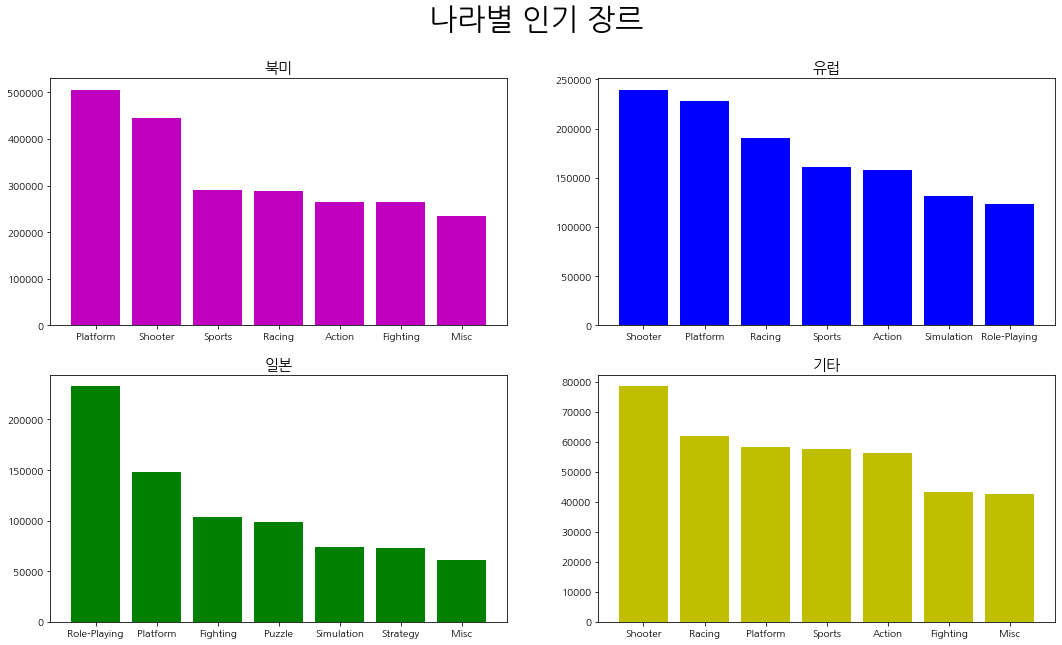

In [ ]:
f = plt.figure(figsize=(18,10))
ax1= f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3= f.add_subplot(223)
ax4 = f.add_subplot(224)

ax1.bar(NA_TOP7.index,NA_TOP7['NA_Sales'], color = 'm')
ax2.bar(EU_TOP7.index,EU_TOP7['EU_Sales'], color = 'b')
ax3.bar(JP_TOP7.index,JP_TOP7['JP_Sales'], color = 'g')
ax4.bar(Other_TOP7.index,Other_TOP7['Other_Sales'], color = 'y')

plt.suptitle('나라별 인기 장르', fontsize = 30)
ax1.set_title("북미", fontsize = 15)
ax2.set_title("유럽", fontsize = 15)
ax3.set_title("일본", fontsize = 15)
ax4.set_title("기타", fontsize = 15)

plt.show()

## $\chi^2$ 테스트

In [ ]:
from scipy.stats import chi2_contingency

df1 = df.loc[:,'Genre']
df2 = df.loc[:,'NA_Sales':'Other_Sales']

GenbyCon = pd.concat([df1,df2],axis=1)
GenbyCon.set_index('Genre', inplace=True)
GenbyCon = GenbyCon[~((GenbyCon['NA_Sales'] == 0)&(GenbyCon['EU_Sales'] == 0)&(GenbyCon['JP_Sales'] == 0)&(GenbyCon['Other_Sales'] == 0))] # 모든 값이 0인 row가 존재, 삭제 필요
GenbyCon_total = GenbyCon.groupby('Genre').mean() # 그룹화 시킴

print('p-value :',chi2_contingency(GenbyCon_total, correction = False)[1])
print('\n')
print('p-value :',chi2_contingency(GenbyCon_total, correction = True)[1])

p-value : 0.0


p-value : 0.0


# 연도별 트렌드 분석

### 범위 지정

너무 오래된 게임은 분석해도 의미 없는것으로 간주 최소 2006이전 제외

2017 이후는 데이터가 현저히 부족하므로 제외

In [ ]:
fill_Gen = df[(df['Year'] >2005) & (df['Year'] < 2017)]

In [ ]:
Year_Gen = pd.crosstab(fill_Gen.Year,fill_Gen.Genre)

### 출시 게임이 많은 순(column)으로 정렬

In [ ]:
Year_Gen_T = Year_Gen.T
Year_Gen_mean = Year_Gen_T.mean(axis=1)
Year_Gen_T['mean'] = Year_Gen_mean
Year_Gen_T =Year_Gen_T.sort_values(by = 'mean', ascending=False)
Year_Gen = Year_Gen_T.T
Year_Gen = Year_Gen.drop(index = 'mean')
Year_Gen

# 년도별 출시 수

Genre,Action,Sports,Misc,Adventure,Role-Playing,Shooter,Simulation,Racing,Fighting,Strategy,Puzzle,Platform
Year,,,,,,,,,,,,
2006.0,184.0,138.0,109.0,71.0,108.0,69.0,58.0,75.0,55.0,42.0,42.0,54.0
2007.0,210.0,167.0,151.0,84.0,103.0,84.0,90.0,84.0,50.0,66.0,65.0,42.0
2008.0,219.0,200.0,210.0,166.0,112.0,83.0,118.0,82.0,57.0,50.0,64.0,62.0
2009.0,271.0,184.0,207.0,141.0,103.0,91.0,123.0,83.0,53.0,65.0,79.0,28.0
2010.0,226.0,185.0,200.0,153.0,103.0,81.0,81.0,57.0,40.0,53.0,45.0,31.0
2011.0,239.0,122.0,183.0,107.0,95.0,94.0,56.0,65.0,49.0,46.0,43.0,37.0
2012.0,264.0,54.0,38.0,57.0,78.0,48.0,18.0,30.0,29.0,15.0,11.0,12.0
2013.0,148.0,53.0,42.0,60.0,70.0,59.0,18.0,16.0,20.0,19.0,3.0,37.0
2014.0,186.0,55.0,41.0,75.0,91.0,47.0,11.0,27.0,23.0,8.0,8.0,10.0


## 연도별 장르 시각화

In [ ]:
ax1_col = Year_Gen.columns[:6]
ax2_col = Year_Gen.columns[6:]

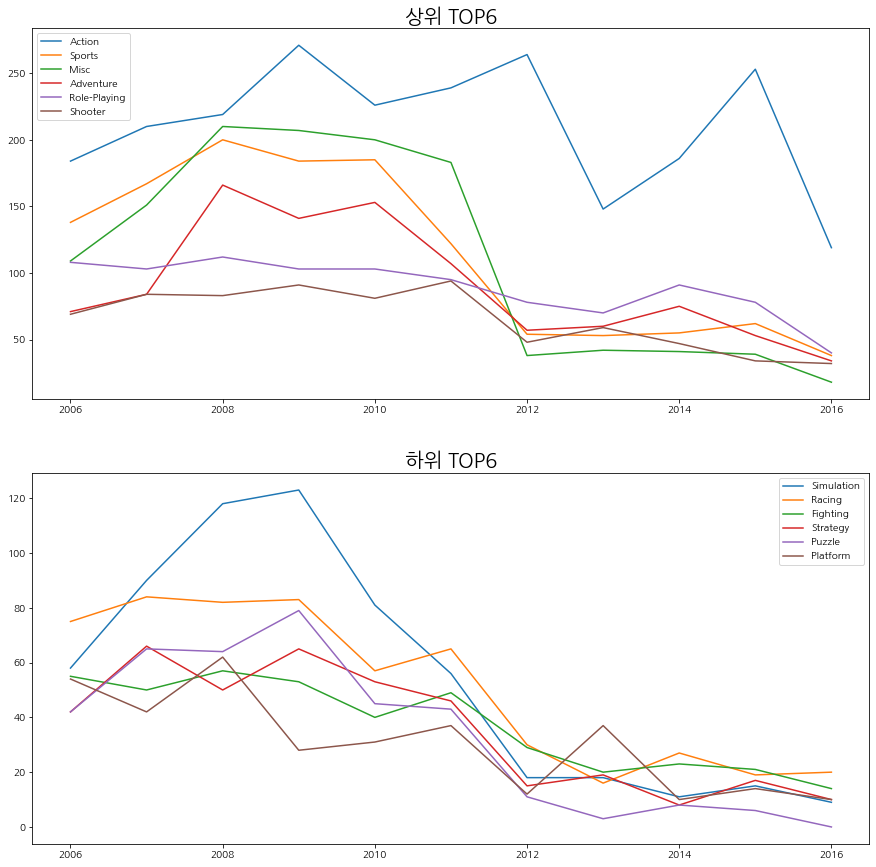

In [ ]:
f = plt.figure(figsize=(15,15))
ax1= f.add_subplot(211)
ax2 = f.add_subplot(212)
ax1.plot(Year_Gen.iloc[:,:6])
ax2.plot(Year_Gen.iloc[:,6:])
ax1.set_title('상위 TOP6', fontsize=20)
ax2.set_title('하위 TOP6', fontsize=20)
ax1.legend(ax1_col)
ax2.legend(ax2_col)
#ax2.ylim(0,110)
plt.show()

## $\chi^2$ 테스트

In [ ]:
print('p-value :',chi2_contingency(Year_Gen, correction = False)[1])
print('\n')
print('p-value :',chi2_contingency(Year_Gen, correction = True)[1])

p-value : 6.024932453033476e-121


p-value : 6.024932453033476e-121


# 출고량 높은 게임 분석

### 출고량이 많은순으로 정렬

In [ ]:
df['total'] = np.sum(df.loc[:,'NA_Sales':'Other_Sales'],axis = 1)
df_high10 = df.sort_values('total', ascending=False).head(10)
df_high20 = df.sort_values('total', ascending=False).head(20) #어떤 장르의 게임이 잘팔리는가 확인

df_high20

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
2909,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
4200,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
12580,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3353,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
7830,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
1204,Tetris,GB,1989.0,Puzzle,Nintendo,23200000.0,2260000.0,4220000.0,580000.0,30260000.0
6938,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0
3015,Wii Play,Wii,2006.0,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0
16532,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14590000.0,7060000.0,4700000.0,2260000.0,28610000.0
10489,Duck Hunt,NES,1984.0,Shooter,Nintendo,26930000.0,630000.0,280000.0,470000.0,28310000.0


### 출고량 높은게임에 대한 시각화(산점도)

In [ ]:
high_label = df_high20['Genre']

#high_label = high_label.drop_duplicates()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


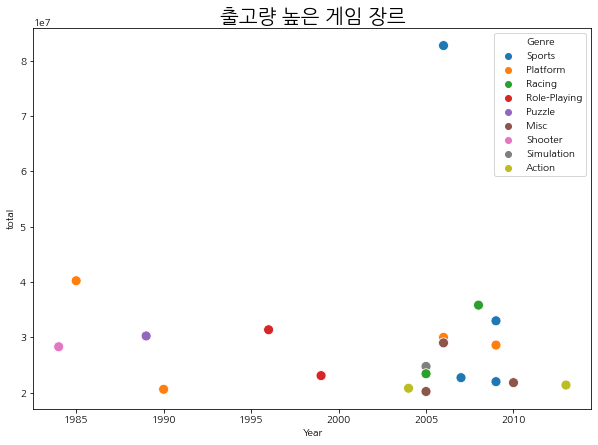

In [ ]:
plt.figure(figsize=(10,7))

sns.scatterplot(df_high20['Year'],df_high20['total'], hue = high_label, s=100)
plt.title('출고량 높은 게임 장르', fontsize=20)
plt.show()

### 출고량 높은게임에 대한 시각화(그래프)

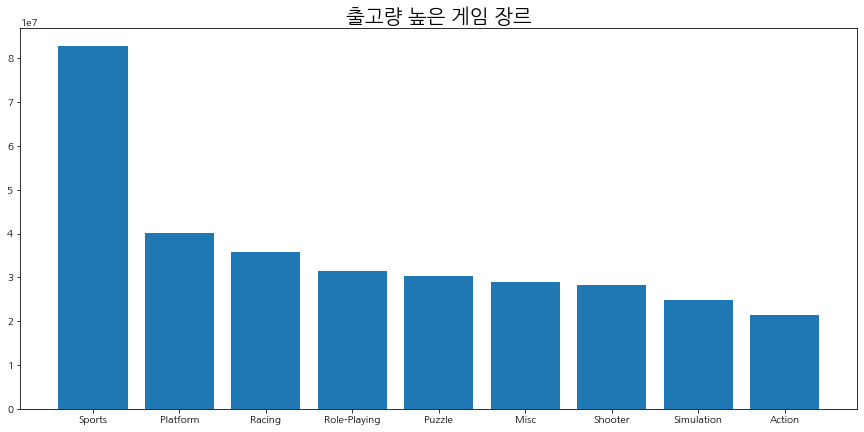

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(df_high20['Genre'],df_high20['total'])
plt.title('출고량 높은 게임 장르', fontsize=20)
plt.show()

### PCA (테스트용)

In [ ]:
df_Genre = df['Genre']
df_trend = df.loc[:,'NA_Sales':'Other_Sales']

scaler = StandardScaler()

scale_trend = pd.DataFrame(scaler.fit_transform(df_trend), columns= df_trend.columns)

pc = PCA()

PCA_data = pd.DataFrame(pc.fit_transform(scale_trend), columns= ['PC1','PC2','PC3','PC4'])

ratio = pc.explained_variance_ratio_

NameError: ignored

In [ ]:
ratio = np.cumsum(ratio)
ratio

In [ ]:
PCA_data[(PCA_data['PC1'] > 20) | (PCA_data['PC2'] > 20)]

In [ ]:
plt.figure(figsize = (12,8))

sns.scatterplot(PCA_data["PC1"],PCA_data["PC2"], hue=df_Genre)

# 개발 방향 분석



In [ ]:
df_New = df[df['Year'] > 2005]

In [ ]:
df_Total = df_New.loc[:,'Genre':'Other_Sales']
df_Total = df_Total.groupby('Genre').mean()
df_Total['Total_Sales'] = np.mean(df_Total, axis = 1)

In [ ]:
df_Gener_Count = df_New['Genre'].value_counts()
df_Gener_Count = pd.DataFrame(df_Gener_Count)

In [ ]:
df_Trend =pd.concat([df_Gener_Count,df_Total['Total_Sales']],axis=1)

In [ ]:
df_Trend['Trend'] = df_Trend['Total_Sales'] / df_Trend['Genre']
df_Trend=df_Trend.sort_values(by = 'Trend',ascending=False)
df_Trend

,Genre,Total_Sales,Trend
Platform,337,209629.080119,622.044748
Shooter,722,242804.709141,336.294611
Fighting,411,115133.819951,280.130949
Racing,558,135071.684588,242.063951
Puzzle,366,62547.814208,170.895667
Simulation,598,92725.752508,155.059787
Role-Playing,983,125788.402848,127.963787
Sports,1258,157486.089030,125.187670
Strategy,391,47078.005115,120.404105
Misc,1238,111447.899838,90.022536


### 트렌드 시각화(Bar 비교)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


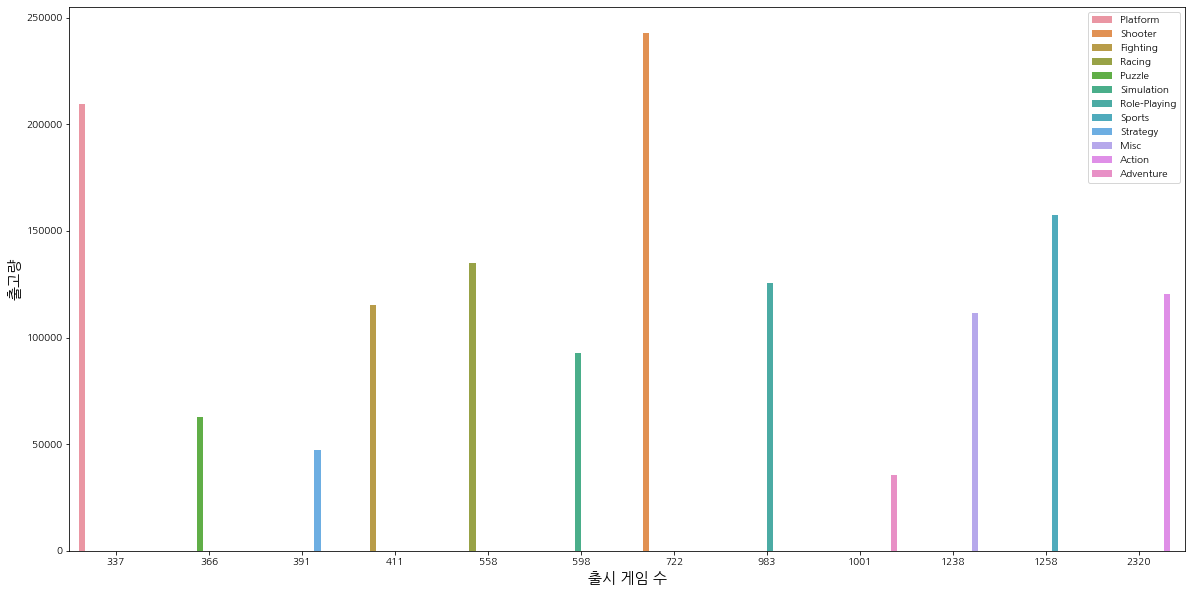

In [ ]:
plt.figure(figsize = (20,10))
sns.color_palette()
sns.barplot(df_Trend['Genre'],df_Trend['Total_Sales'], hue = df_Trend.index)
plt.xlabel('출시 게임 수', fontsize =15)
plt.ylabel('출고량', fontsize =15)
plt.show()

### 트렌드 시각화(장르별 출고량)

결론 : Platform, Shooter, Racing 이 세가지가 게임 개당 판매량이 높다는것을 알 수 있다

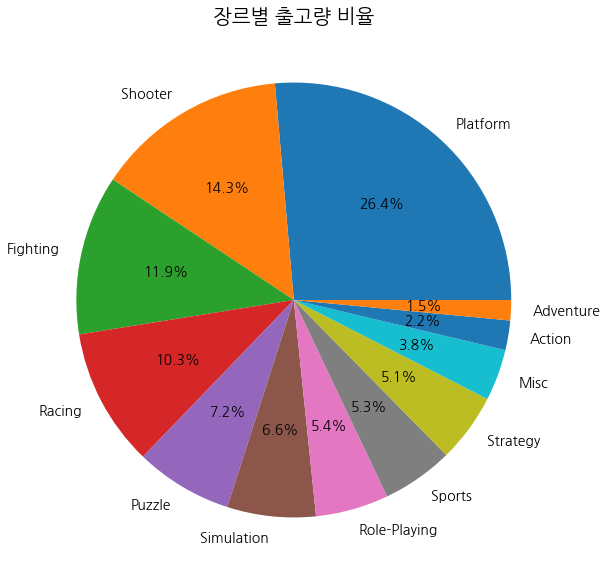

In [ ]:
plt.figure(figsize = (10,10))
labels = df_Trend.index
plt.pie(df_Trend['Trend'],autopct='%.1f%%', labels= labels,  textprops={'fontsize': 14})
plt.title('장르별 출고량 비율', fontsize = 20)
plt.show()